# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 4. Матричный профиль. Поиск примитивов на его основе.**

Смените рабочую директорию с помощью команды `chdir()`. Для этого передайте этой команде свой путь до каталога, в котором содержатся материалы четвертой практической работы. После выполнения этой команды все последующие операции с файлами и каталогами будут производиться относительно указанного каталога.

In [1]:
import os

practice_dir_path = 'E:/ЮУРГУ/Магистратура/3 Семестр/ВРЕМЕННЫЕ РЯДЫ/2024-Mylnikov-TimeSeriesCourse/practice/04 Matrix profile'
os.chdir(practice_dir_path)

Выполните команды, которые автоматически перезагружают все импортированные модули при их изменении.

In [2]:
%load_ext autoreload
%autoreload 2

Импортируйте библиотеки и модули, необходимые для реализации практической работы 4.

In [3]:
pip install stumpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import os
import datetime

from modules.plots import *
from modules.mp import compute_mp
from modules.motifs import top_k_motifs
from modules.discords import top_k_discords

## **Часть 1.** Матричный профиль. Поиск мотивов и диссонансов.

### **Задача 1.**
Загрузите временной ряд, который содержит данные о почасовом потреблении электроэнергии некоторого итальянского города, снимаемые в течение 3 лет, начиная с 1 января 1995 года.

In [6]:
ts_url = './datasets/part1/italianpowerdemand.csv'

ts = pd.read_csv(ts_url, header=None).squeeze().to_numpy()

Визуализируйте временной ряд, используя функцию `plot_ts()` из модуля *plot.py*.

In [7]:
plot_ts(ts, "Input time series")

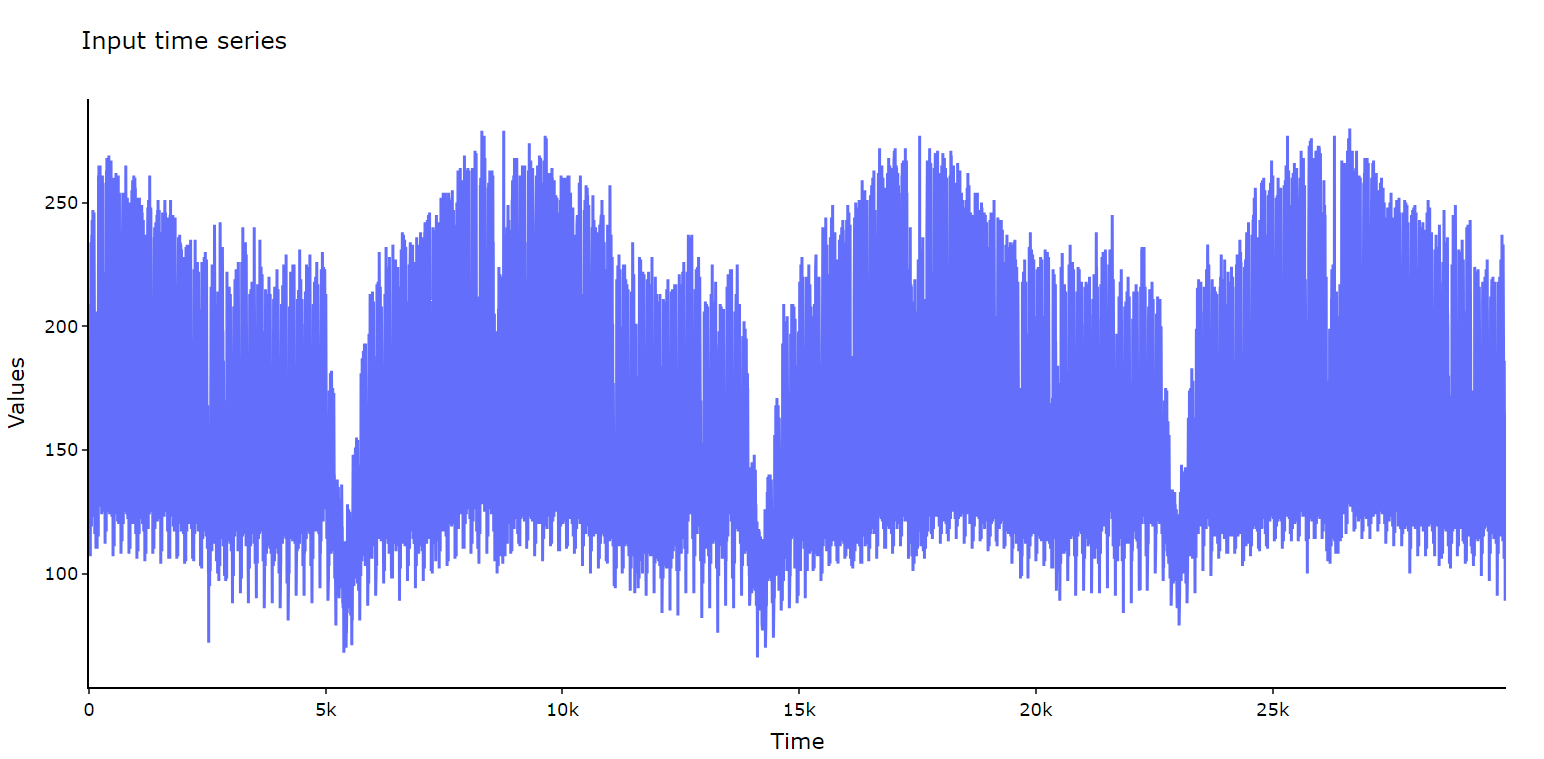

Анализ временных рядов на основе матричного профиля осуществляет библиотека [stumpy](https://stumpy.readthedocs.io/en/latest/index.html). Напишите функцию `compute_mp()` в модуле *mp.py*, которая вычисляет матричный профиль временного ряда на основе выбранной вами функции из библиотеки *stumpy*.

In [8]:
m = 165
excl_zone = int(np.ceil(m / 2))
mp = {}

# Вычисление матричного профиля
mp = compute_mp(ts, m, excl_zone)
mp

{'mp': array([2.6090936641687352, 2.5924180135439014, 2.5987763812476827, ...,
        2.007681867612602, 2.020641558173467, 2.030675731613809],
       dtype=object),
 'mpi': array([8761, 8762, 8763, ..., 21195, 21196, 21197], dtype=object),
 'm': 165,
 'excl_zone': 83,
 'data': {'ts1': array([127., 126., 120., ..., 143., 161., 151.]),
  'ts2': None}}

Визуализируйте найденный матричный профиль ряда.

In [9]:
plot_ts(mp['mp'], "Matrix Profile")

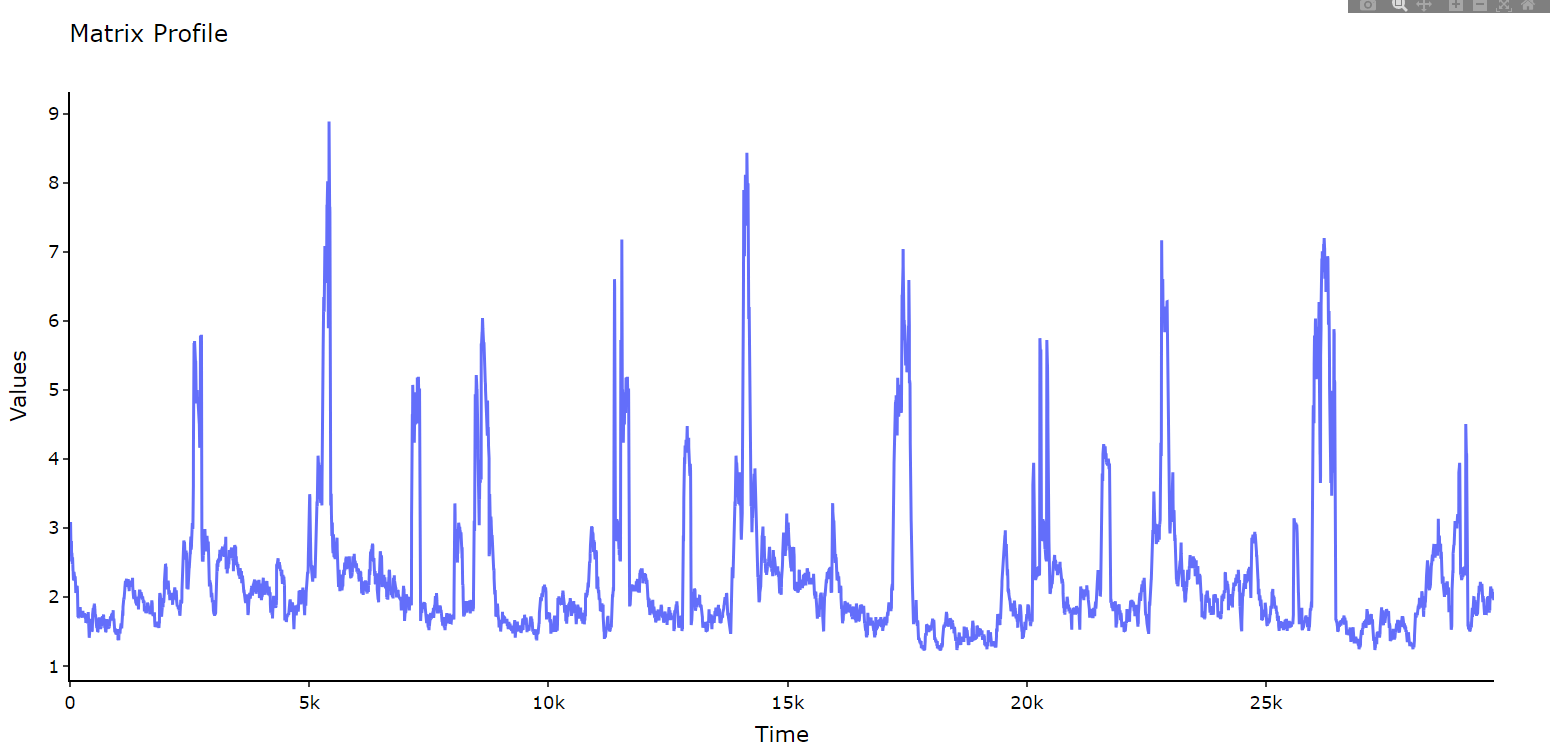

### **Задача 2.**
Выполните поиск top-$k$ мотивов в исходном временном ряде на основе построенного матричного профиля. Для этого реализуйте самостоятельно функцию `top_k_motifs()` в модуле *motifs.py*. Среди найденных мотивов не должно быть тривиальных совпадений, поэтому в `top_k_motifs()` добавьте вызов функции `apply_exclusion_zone()` из модуля *utils.py*.

In [10]:
import numpy as np
import stumpy


# Поиск топ-6 мотивов с помощью stumpy.motifs
top_k = 6
motifs_stumpy = stumpy.motifs(ts.astype(np.float64), mp['mp'], max_matches=top_k)
motifs_stumpy_result = {
    'indices': [sorted([motifs_stumpy[1][0][i], motifs_stumpy[1][0][i + 1]]) for i in range(0, len(motifs_stumpy[1][0]) - 1, 2)],
    'distances': list(motifs_stumpy[0])
}

# Поиск топ-3 мотивов с помощью реализованной функции top_k_motifs
motifs_custom_result = top_k_motifs(mp, ts, top_k=6)

# Вывод результатов
print("Motifs using stumpy.motifs:")
print(motifs_stumpy_result)

print("\nMotifs using custom top_k_motifs function:")
print(motifs_custom_result)

Motifs using stumpy.motifs:
{'indices': [[17852, 18188], [26757, 26925], [9115, 18020]], 'distances': [array([1.97067505e-06, 1.22662519e+00, 1.38209556e+00, 1.58593003e+00,
       1.65793207e+00, 1.66933021e+00])]}

Motifs using custom top_k_motifs function:
{'indices': [(17852, 18188), (26925, 26757), (9115, 18020)], 'distances': array([[1.97067505e-06, 1.22662519e+00, 1.38209556e+00, 1.58593003e+00,
        1.65793207e+00, 1.66933021e+00]])}


Выполните визуализацию найденных top-$k$ мотивов с помощью функции `plot_motifs()` из *plots.py*.

In [11]:
plot_motifs(mp, motifs_stumpy_result)

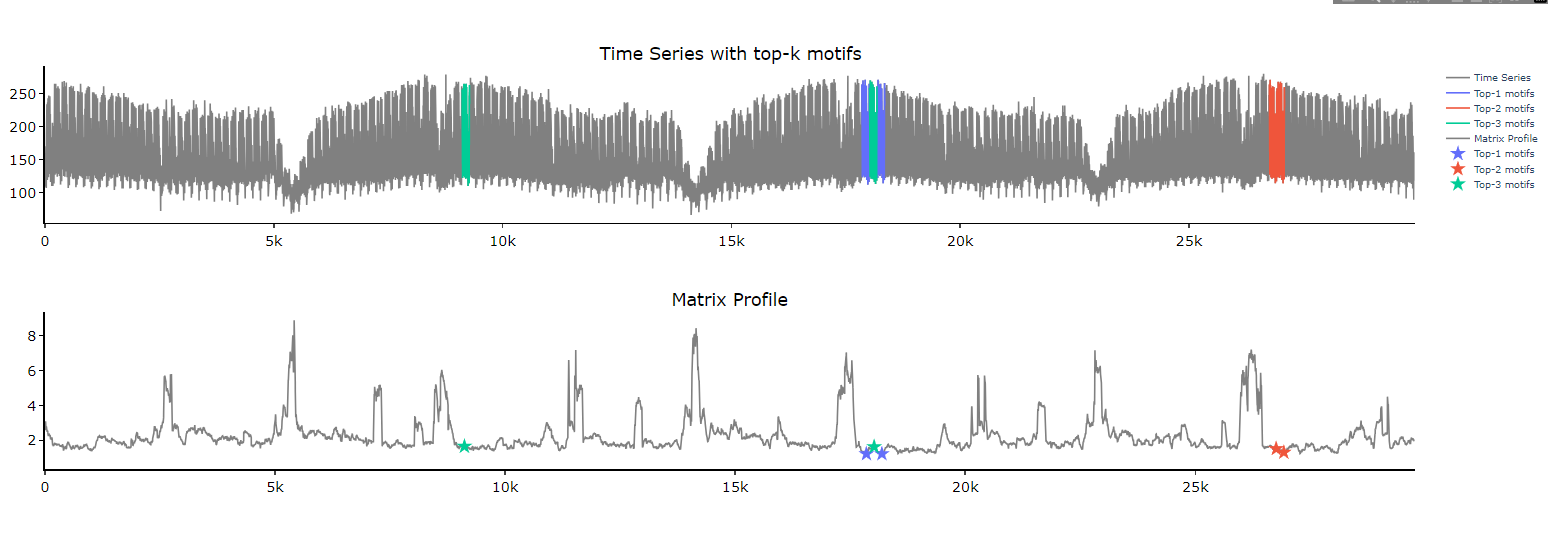

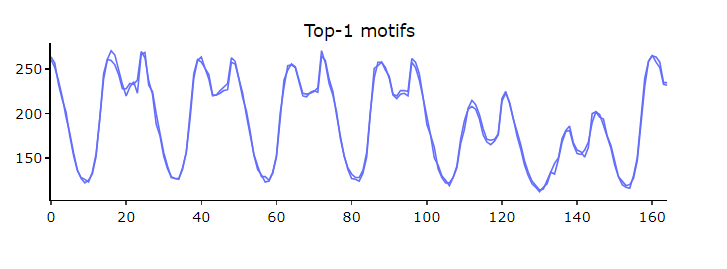

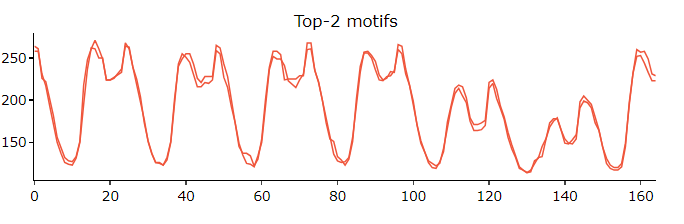

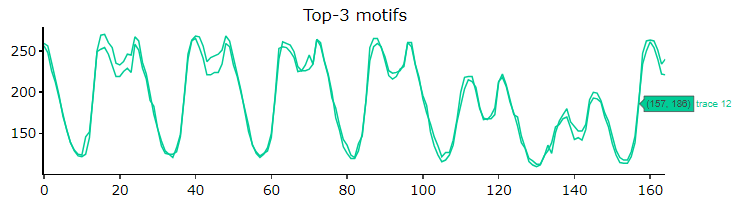

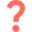
Проанализируйте и изложите содержательный смысл полученных результатов.

Первый график представляет собой временной, представляющий собой сезонные колебания спроса на электроэнергию. 

Второй график представляет собой матричный профиль. Матричный профиль отображает минимальные дистанции между каждыми подпоследовательностями временного ряда и их наиболее похожими подпоследовательностями. Низкие значения профиля указывают на схожие участки во временном ряде, что является индикатором возможных мотивов. В профиле видно несколько ярко выраженных минимумов, которые и указывают на вероятные мотивы.

Ниже графиков временного графика и матричного профиля представлены графики топ-6 мотивов.

### **Задача 3.**
Реализуйте самостоятельно функцию `top_k_discords()` в модуле *discords.py*, предназначенную для поиска top-$k$ диссонансов во временном ряде на основе матричного профиля. Чтобы исключить попадание тривиальных совпадений в результирующее множество диссонансов воспользуйтесь функцией `apply_exclusion_zone()` из модуля *utils.py*.

Загрузите временной ряд *nyc_taxi.csv* из директории *./datasets/part1/*, содежащий данные о среднем числе пассажиров NY такси за осень 2014 года.

In [12]:
ts_url = './datasets/part1/nyc_taxi.csv'

ts = pd.read_csv(ts_url, index_col=0, header=0).squeeze().to_numpy()
plot_ts(ts, "Input time series")

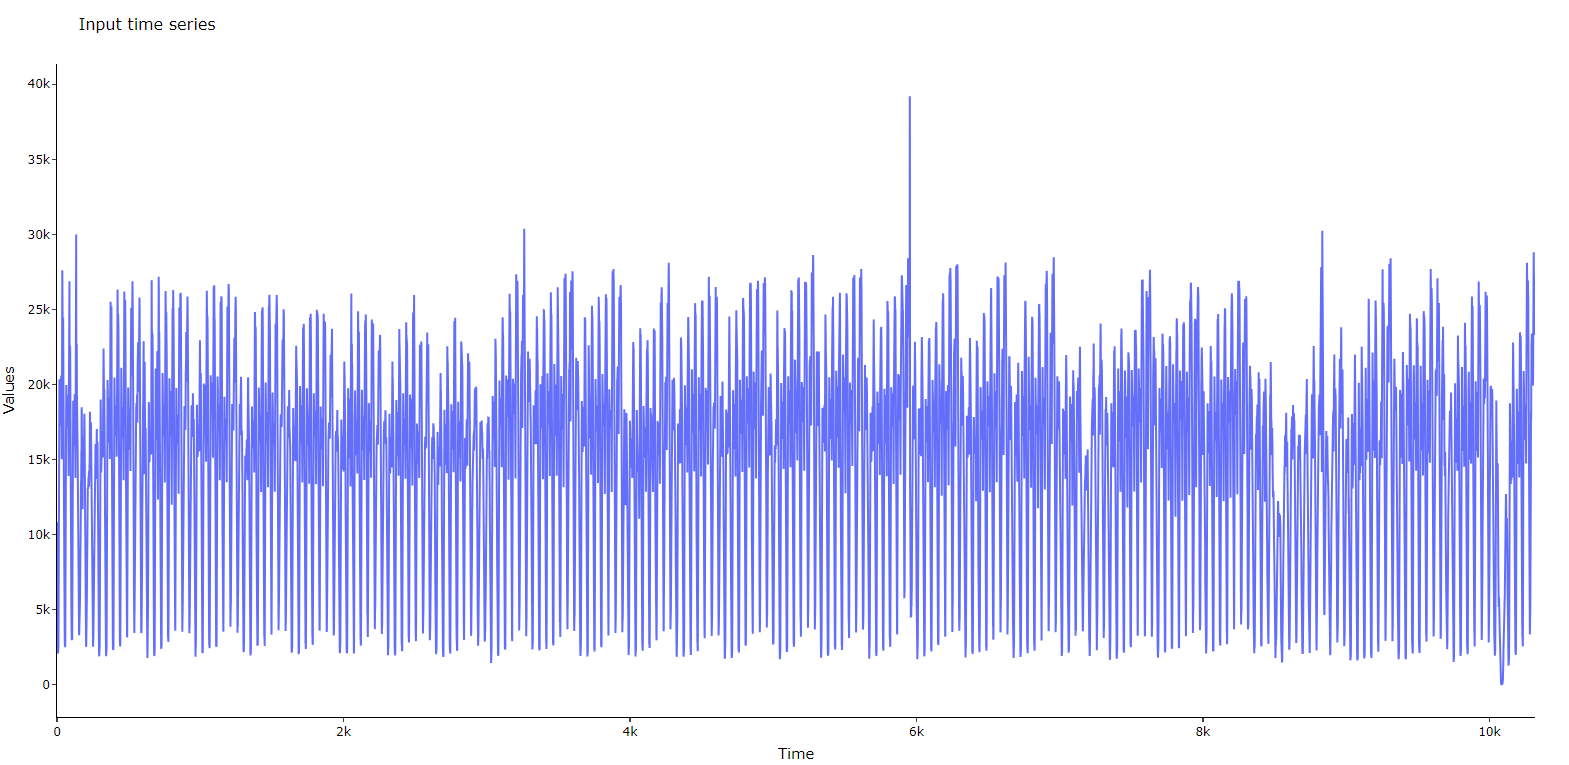

In [13]:
m = 96
excl_zone = int(np.ceil(m / 2))
mp = {}

ts = pd.read_csv(ts_url, index_col=0, header=0).squeeze().to_numpy().astype(np.float64)

mp = compute_mp(ts.astype(np.float64), m, excl_zone)

In [14]:
from modules.discords import top_k_discords
top_k = 15
discords = {}

discords = top_k_discords(mp, top_k)

Выполните визуализацию найденных top-$k$ диссонансов.

In [15]:
plot_discords(mp, discords)

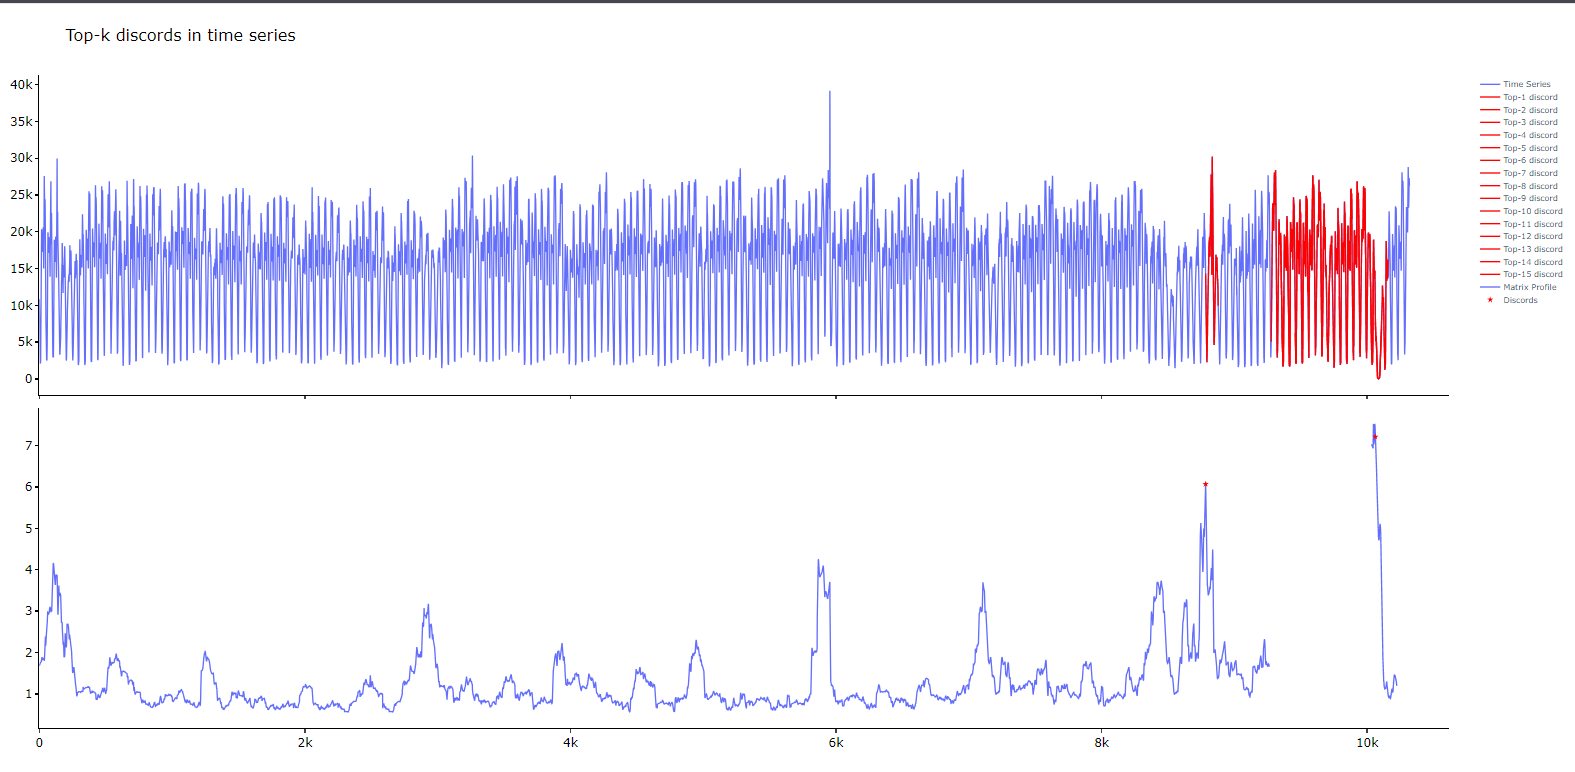

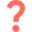
Проанализируйте и изложите содержательный смысл полученных результатов.

Нижний график представляет матричный профиль временного ряда. Профиль показывают схожесть между сегментами временного ряда. Низкие значения на графике матричного профиля указывают на высокую степень схожести между сегментами, а высокие значения свидетельствуют о потенциальных аномалиях или "дискордах".

Дискорды — это сегменты временного ряда, которые меньше всего похожи на другие сегменты и, вероятно, представляют собой аномалии.

Верхний график содержит красные метки топ-15 дискордов, они показывают аномальные паттерны или редкие события. Эти сегменты могут соответствовать необычным или редким событиям, влияющим на поездки на такси в городе. Такие события могут включать праздничные дни, экстремальные погодные условия, транспортные проблемы, митинги или даже чрезвычайные ситуации.


Вывод:

Дискорды могут свидетельствовать о праздниках, днях с экстремальными погодными условими или других инцидентов, которые повлияли на количество поездок на такси. Также аномалии могут быть вызваны сбоями из-за технических проблем при сборе данных.

## **Часть 2.** Сегментация повторяющихся активностей.

### **Задача 4.**

Загрузите временной ряд PAMAP *pamap.csv* из директории *./datasets/part2/*, представляющий собой показания закрепленного на человеке виброакселерометра. Данный ряд включает показания, снятые при выполнении человеком трех видов физической активности: ходьба, подъем по лестнице и спуск по лестнице. Необходимо сегментировать временной ряд на основе его матричного профиля для определения того, когда человек шел и когда поднимался/спускался. Поскольку подъем и спуск по лестнице – это схожие действия, поэтому будем считать, что это одна активность.  

In [16]:
ts_url = './datasets/part2/pamap.csv'

ts = pd.read_csv(ts_url, header=None).squeeze().to_numpy()

Визуализируйте временной ряд PAMAP.

In [17]:
plot_ts(ts, "Input time series")

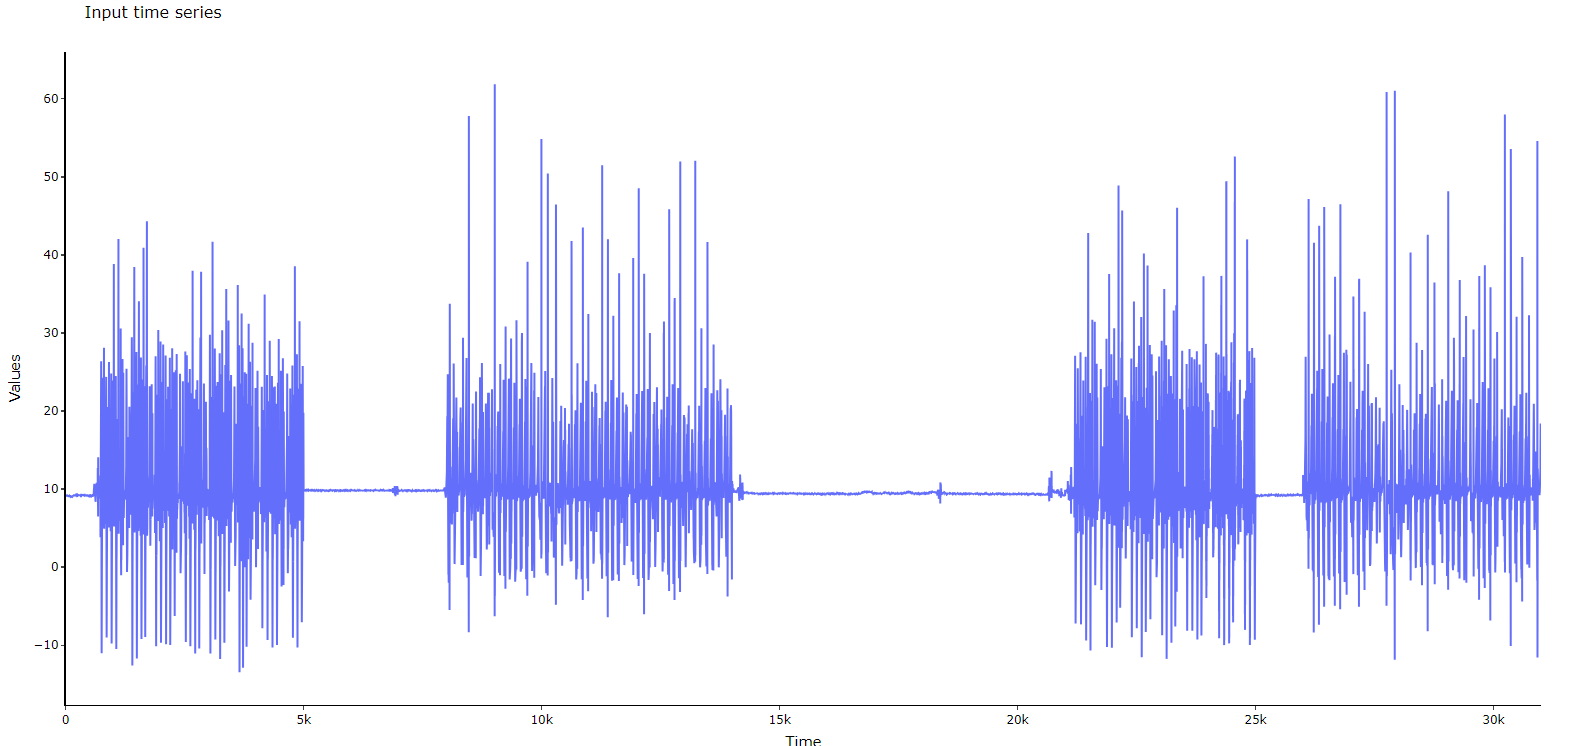

Найдите и визуализируйте матричный профиль временного ряда.

In [18]:
m = 100
excl_zone = m
mp = {}

mp = compute_mp(ts, m, excl_zone)

In [19]:
plot_ts(mp['mp'], "Matrix Profile")

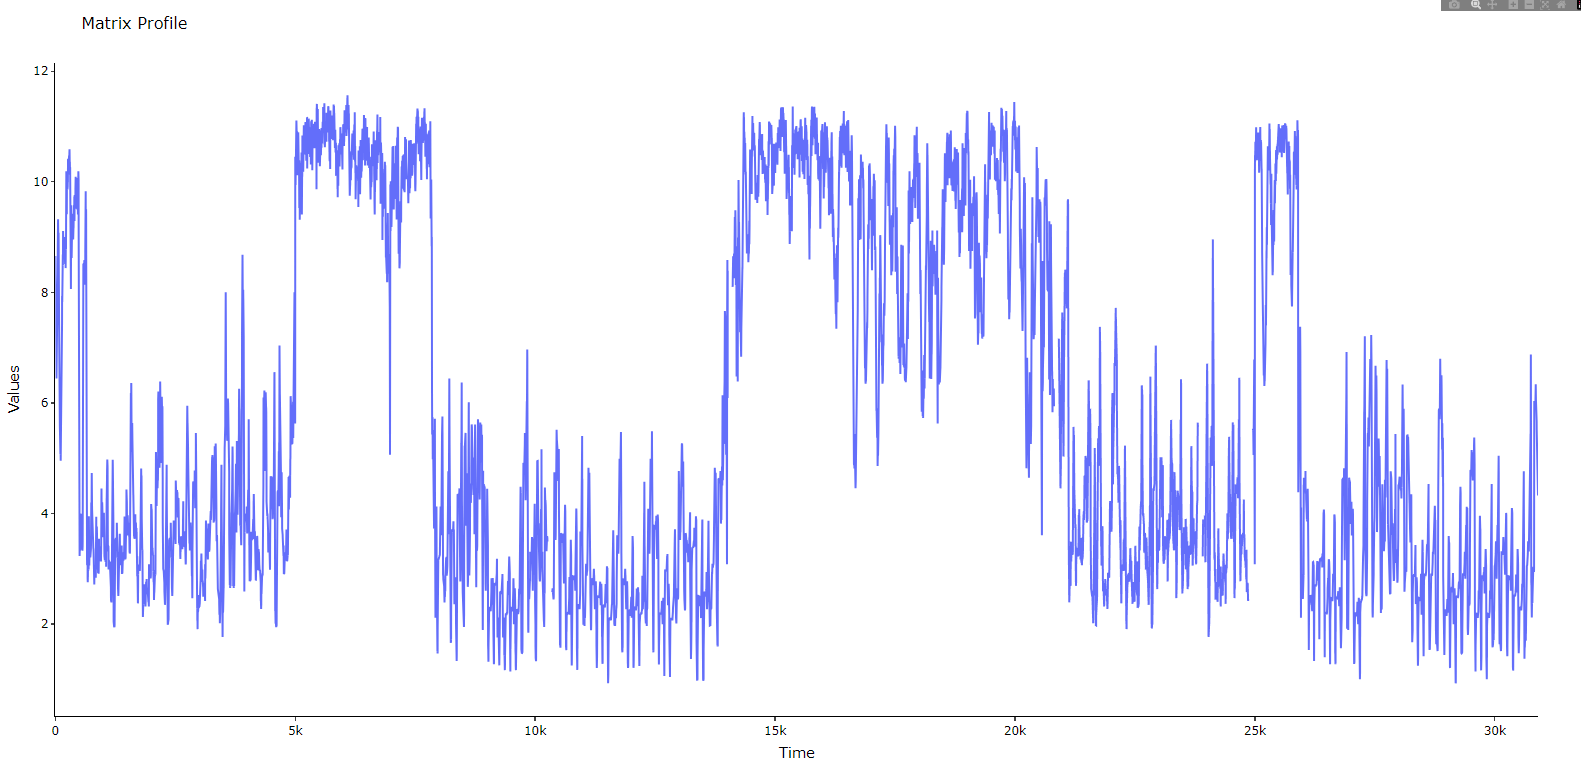

Вычислите порог по формуле, которая представлена в презентации [04 Matrix profile.pdf](https://github.com/mzym/TimeSeriesCourse/blob/main/slides/04%20Matrix%20profile.pdf).

In [20]:
# Определение порога
threshold = 8

In [21]:
df = pd.DataFrame([mp['mp'], mp['mpi']]).T
df = df.loc[df[0] != np.inf]
#матричный профиль и индексы матричного профиля
mp['mp'] = np.array(df[0])
mp['mpi'] = np.array(df[1])

Выполните визуализацию результатов сегментации повторяющихся активностей.

In [22]:
plot_segmentation(mp, threshold)

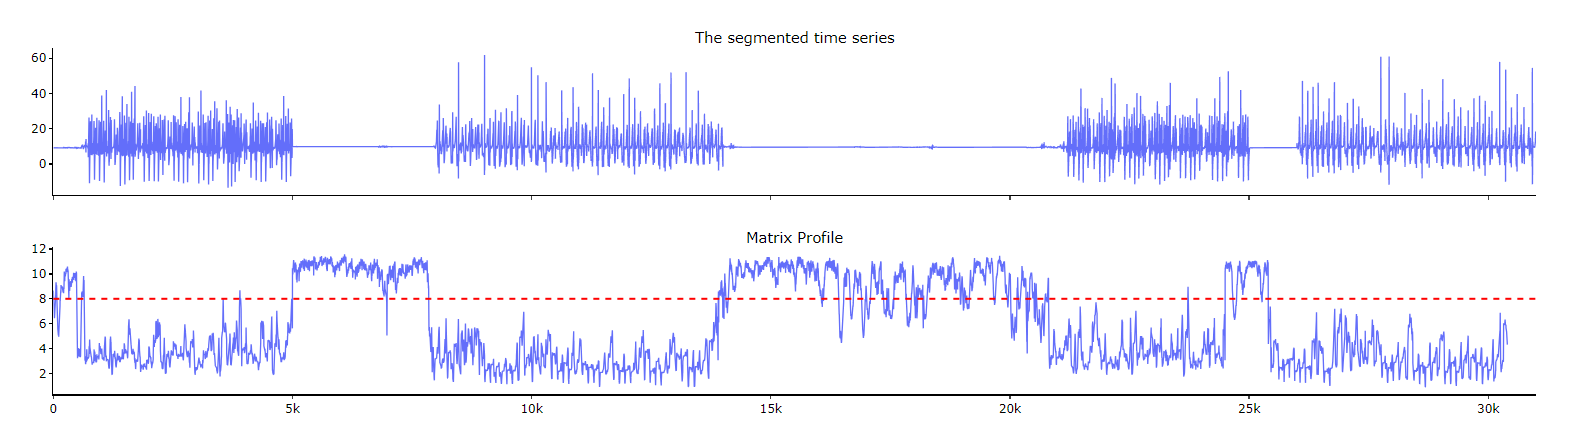

Загрузите истинную разметку временного ряда PAMAP *pamap_labels.csv*, где 0 означает ходьбу, 1 – подъем по лестнице, 2 – спуск с лестницы. Вычислите точность по метрике accuracy, сравнив полученные результаты по основе матричного профиля с истинной разметкой.

In [64]:
labels_url = './datasets/part2/pamap_labels.csv'

labels = pd.read_csv(labels_url, header=None).squeeze().to_numpy()

In [65]:
labels

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [66]:
# Проверка на наличие NaN
has_nan = np.isnan(labels).any()
if has_nan:
    print("Массив содержит NaN значения.")
else:
    print("Массив не содержит NaN значения.")

# Проверка на наличие Inf
has_inf = np.isinf(labels).any()
if has_inf:
    print("Массив содержит Inf значения.")
else:
    print("Массив не содержит Inf значения.")

Массив не содержит NaN значения.
Массив не содержит Inf значения.


In [67]:
from sklearn.metrics import accuracy_score

labels = np.where(labels == 2, 1, labels)
labels = labels[m:]
labels = labels[sorted(mp['mpi'].astype(int))]

valid_indices = mp['mp'].astype(int)
labels = labels[valid_indices]

labels_pred = (mp['mp'] < threshold).astype(int)
accuracy = accuracy_score(labels, labels_pred)
print("Точность (accuracy):", accuracy)

Точность (accuracy): 0.6868524061708496


## **Чaсть 3.** Casy Study: Раскрытие краж электричества подменой счетчиков (meter-swapping detection).


### **Задача 5.**

Рассмотрим практическое применение использования матричного профиля для решения задачи, связанной с раскрытием краж электричества путем подмены счетчиков.

Загрузите временные ряды из директории *./datasets/part3/*, которые были выбраны случайным образом из набора данных (House 1, 2, 3, 4 и 11), содержащего данные потребления электроэнергии 20 жилых домов в Великобритании с 1 января по 23 декабря 2014 года.

In [ ]:
path = './datasets/part3/'

house_idx = [1, 2, 3, 4, 11]

filenames = [f"House{i}.csv" for i in house_idx]

consumptions = {}
for house in filenames:
    consumptions[house[:-4]] = pd.read_csv(os.path.join(path, house), header=None, index_col=0)
    consumptions[house[:-4]].index = pd.to_datetime(consumptions[house[:-4]].index, dayfirst=True)

Далее смоделируем событие замены счетчика. Для этого каждый временной ряд разделим на две части: "Head" (до 1 октября) и "Tail" (после 1 октября). После чего выберем случайным образом 2 временных ряда (например, House1 и House11) и поменяем местами их "Tail" части.

In [ ]:
cutoff = pd.to_datetime('2014-10-01')
heads, tails = heads_tails(consumptions, cutoff, house_idx)

#swap Heads and Tails of 1 and 11
swap1, swap2 = 1, 11
consumptions[f'House{swap1}'] = heads[f'H_{swap1}'].append(tails[f'T_{swap2}'])
consumptions[f'House{swap2}'] = heads[f'H_{swap2}'].append(tails[f'T_{swap1}'])
heads, tails = heads_tails(consumptions, cutoff, house_idx)

Визуализируйте исходные временные ряды и параллельную оси OY прямую, которая делит временные ряды на "Head" и "Tail" части.

In [ ]:
plot_consumptions_ts(consumptions, cutoff, house_idx)

Чтобы найти переставленную пару временных рядов, выполним следующее. Сначала составим временные ряды $H_i$ из всевозможных комбинаций "Head" и "Tail" частей исходных временных рядов $T_K$, где $1 \leq i \leq |T|^2$, $1 \leq K \leq |T|$. В нашем случае, $|T| = 5$.  Далее среди них найдем такую пару временных рядов $(H_i, H_j)$, которая имеет минимальную оценку $swap\_score$. Минимальная оценка $swap\_score$ для пары рядов $(H_i, H_j)$ вычисляется следующим образом:

\begin{equation}
swap\_score(i,j) = \frac{\min{(Head_{H_i} \bowtie Tail_{H_j})}}{\min{(Head_{H_i} \bowtie Tail_{H_i})}+eps},
\end{equation}

где $\bowtie$ – операция нахождения матричного профиля между двумя временными рядами. Матричный профиль между двумя временными рядами содержит расстояния между всеми подпоследовательностями первого временного ряда и их ближайшими соседями, которые являются подпоследовательностями второго временного ряда.

Добавьте в функцию `compute_mp()` в модуле *mp.py* поддежку вычисления матричного профиля между двумя различными временными рядами и найдите пару временных рядов $(H_i, H_j)$, которая имеет минимальную оценку $swap\_score$ среди всех пар.

In [ ]:
m = 24 * 4

min_score = meter_swapping_detection(heads, tails, house_idx, m)

In [ ]:
min_i, min_j, mp_j = min_score['i'], min_score['j'], min_score['mp_j']
print(f'Time series with minimum score is (H_{min_i}, T_{min_j}).')

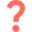
Проанализируйте и изложите содержательный смысл полученных результатов.

*# WRITE YOUR ANSWER*